# DAT210x - Programming with Python for DS

## Module4- Lab5

In [1]:
import pandas as pd

from scipy import misc
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# Look pretty...

# matplotlib.style.use('ggplot')
plt.style.use('ggplot')

Create a regular Python list (not NDArray) and name it `samples`:

In [58]:
samples = []

Code up a for-loop that iterates over the images in the `Datasets/ALOI/32/` folder. Look in the folder first, so you know how the files are organized, and what file number they start from and end at.

Load each `.png` file individually in your for-loop using the instructions provided in the Feature Representation reading. Once loaded, flatten the image into a single-dimensional NDArray and append it to your `samples` list.

**Optional**: You can resample the image down by a factor of two if you have a slower computer. You can also scale the image from `0-255` to `0.0-1.0` if you'd like--doing so shouldn't have any effect on the algorithm's results.

In [59]:
import os

import imageio

for file in os.listdir('Datasets/ALOI/32'):
    path = os.path.join('Datasets/ALOI/32', file)
    img = imageio.imread(path).reshape(-1)
    samples.append(img)

# for file1 in os.listdir('Datasets/ALOI/32i'):
#     path = os.path.join('Datasets/ALOI/32i', file1)
#     img1 = imageio.imread(path).reshape(-1)
#     samples.append(img1)
    
print(len(samples))

72


Convert `samples` to a DataFrame named `df`:

In [63]:
import pandas as pd
import numpy as np
print(np.array(samples))

df = pd.DataFrame(samples)
print(df.shape)

colors = []
for i in range(72):
    colors.append(i)
# for i in range(12):
#     colors.append(i)
    

[[ 4  4  4 ..., 12 12  7]
 [ 4  4  4 ..., 13 13  7]
 [ 4  4  4 ..., 12 11  6]
 ..., 
 [ 4  4  4 ..., 12 12  7]
 [ 4  4  4 ..., 11 11  7]
 [ 4  4  4 ..., 11 11  7]]
(72, 27648)


Import any necessary libraries to perform Isomap here, reduce `df` down to three components and using `K=6` for your neighborhood size:

In [64]:
from sklearn import manifold
iso = manifold.Isomap(n_neighbors = 6, n_components = 3)
Z = iso.fit_transform(df)

Create a 2D Scatter plot to graph your manifold. You can use either `'o'` or `'.'` as your marker. Graph the first two isomap components:

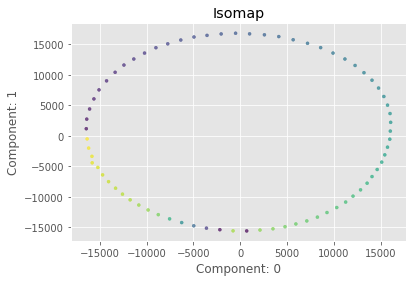

In [66]:
import math, random

def Plot2D(T, title, x, y, c=colors):
  fig = plt.figure()
  ax = fig.add_subplot(111)
  ax.set_title(title)
  ax.set_xlabel('Component: {0}'.format(x))
  ax.set_ylabel('Component: {0}'.format(y))
  x_size = (max(T[:,x]) - min(T[:,x])) * 0.08
  y_size = (max(T[:,y]) - min(T[:,y])) * 0.08
  # It also plots the full scatter:
  ax.scatter(T[:,x],T[:,y], marker='.', c = colors, alpha=0.7)
Plot2D(Z, 'Isomap', 0,1)
plt.show()